In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

## 2. Load Dataset

In [2]:
data = pd.read_csv("Datasets\Mumbai_Property.csv")

In [3]:
data.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Highway Malad,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [4]:
data.shape

(2580, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2580 non-null   object 
 1   Location       2580 non-null   object 
 2   Region         2580 non-null   object 
 3   Property_Age   2580 non-null   object 
 4   Availability   2580 non-null   object 
 5   Area_Tpye      2580 non-null   object 
 6   Area_SqFt      2580 non-null   float64
 7   Rate_SqFt      2580 non-null   int64  
 8   Floor_No       2580 non-null   int64  
 9   Bedroom        2580 non-null   int64  
 10  Bathroom       2580 non-null   int64  
 11  Price_Lakh     2580 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 242.0+ KB


In [6]:
data.Availability.value_counts()

Ready To Move         2565
Under Construction      15
Name: Availability, dtype: int64

In [7]:
data.Region.value_counts().head(5)

Navi Mumbai       803
Central Mumbai    225
Mira Road         201
Mumbai Thane      166
Mumbai Harbour    104
Name: Region, dtype: int64

In [8]:
data.Region.nunique()

172

In [9]:
data.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2580.00,2580.00,2580.00,2580.00,2580.00,2580.00
mean,1026.11,19111.85,8.84,1.96,2.07,174.39
std,2287.13,40760.88,8.10,0.84,0.75,369.48
min,33.57,84.00,0.00,1.00,1.00,13.00
25%,630.75,8791.75,3.00,1.00,2.00,67.00
50%,850.00,13785.00,6.00,2.00,2.00,111.50
75%,1156.00,22650.00,12.00,2.00,2.00,200.00
max,100000.00,1650000.00,59.00,6.00,7.00,16500.00


In [10]:
Q1 = np.quantile(data.Area_SqFt, 0.02)
Q3 = np.quantile(data.Area_SqFt, 0.98)
IQR = np.median(data.Area_SqFt)
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
outliers = data.Area_SqFt[(data.Area_SqFt <= lower_bound) | (data.Area_SqFt >= upper_bound)]

data = data.drop(outliers.index).reset_index(drop = True)

In [11]:
Q1 = np.quantile(data.Rate_SqFt, 0.02)
Q3 = np.quantile(data.Rate_SqFt, 0.98)
IQR = np.median(data.Rate_SqFt)
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
outliers = data.Rate_SqFt[(data.Rate_SqFt <= lower_bound) | (data.Rate_SqFt >= upper_bound)]

data = data.drop(outliers.index).reset_index(drop = True)

In [12]:
data.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2548.00,2548.00,2548.00,2548.00,2548.00,2548.00
mean,944.61,16793.76,8.86,1.95,2.05,163.24
std,462.01,10745.94,8.11,0.83,0.73,163.83
min,185.00,1808.00,0.00,1.00,1.00,13.00
25%,635.00,8777.75,3.00,1.00,2.00,67.00
50%,850.00,13686.00,6.00,2.00,2.00,110.00
75%,1150.00,22415.75,12.00,2.00,2.00,199.00
max,3500.00,67350.00,59.00,6.00,7.00,1800.00


In [13]:
data.isna().sum()

Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Tpye        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

In [14]:
data.duplicated().sum()

7

In [15]:
data = data.drop_duplicates(ignore_index=True)

In [16]:
data.shape

(2541, 12)

In [17]:
data.to_csv('Datasets\Final_dataset.csv', index = False)


,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Highway Malad,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2536,Shagun White Woods,Sector 23 Ulwe Navi Mumbai Mumbai,Navi Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1180.0,10338,2,2,2,122.0
2537,Guru Anant,Sector 2 Ulwe Navi Mumbai Mumbai,Navi Mumbai,0 to 1 Year,Ready To Move,Built Up Area,1090.0,8073,11,2,2,88.0
2538,Balaji Mayuresh Delta,Ulwe Navi Mumbai Mumbai,Navi Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1295.0,10579,6,2,2,137.0
2539,Balaji Mayuresh Delta,Ulwe Navi Mumbai Mumbai,Navi Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1850.0,9243,6,3,3,171.0


In [32]:
data_prob = pd.read_csv('Datasets\Final_dataset.csv')
data_prob

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2526,Shagun White Woods,Sector 23 Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1180.0,10338,2,2,2,122.0
2527,Guru Anant,Sector 2 Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,0 to 1 Year,Ready To Move,Built Up Area,1090.0,8073,11,2,2,88.0
2528,Balaji Mayuresh Delta,Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1295.0,10579,6,2,2,137.0
2529,Balaji Mayuresh Delta,Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1850.0,9243,6,3,3,171.0


## 3. Data Visualization

### 3.1 Set rcParams foe all Visualization

In [33]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

### 3.2 Hunting Outliers

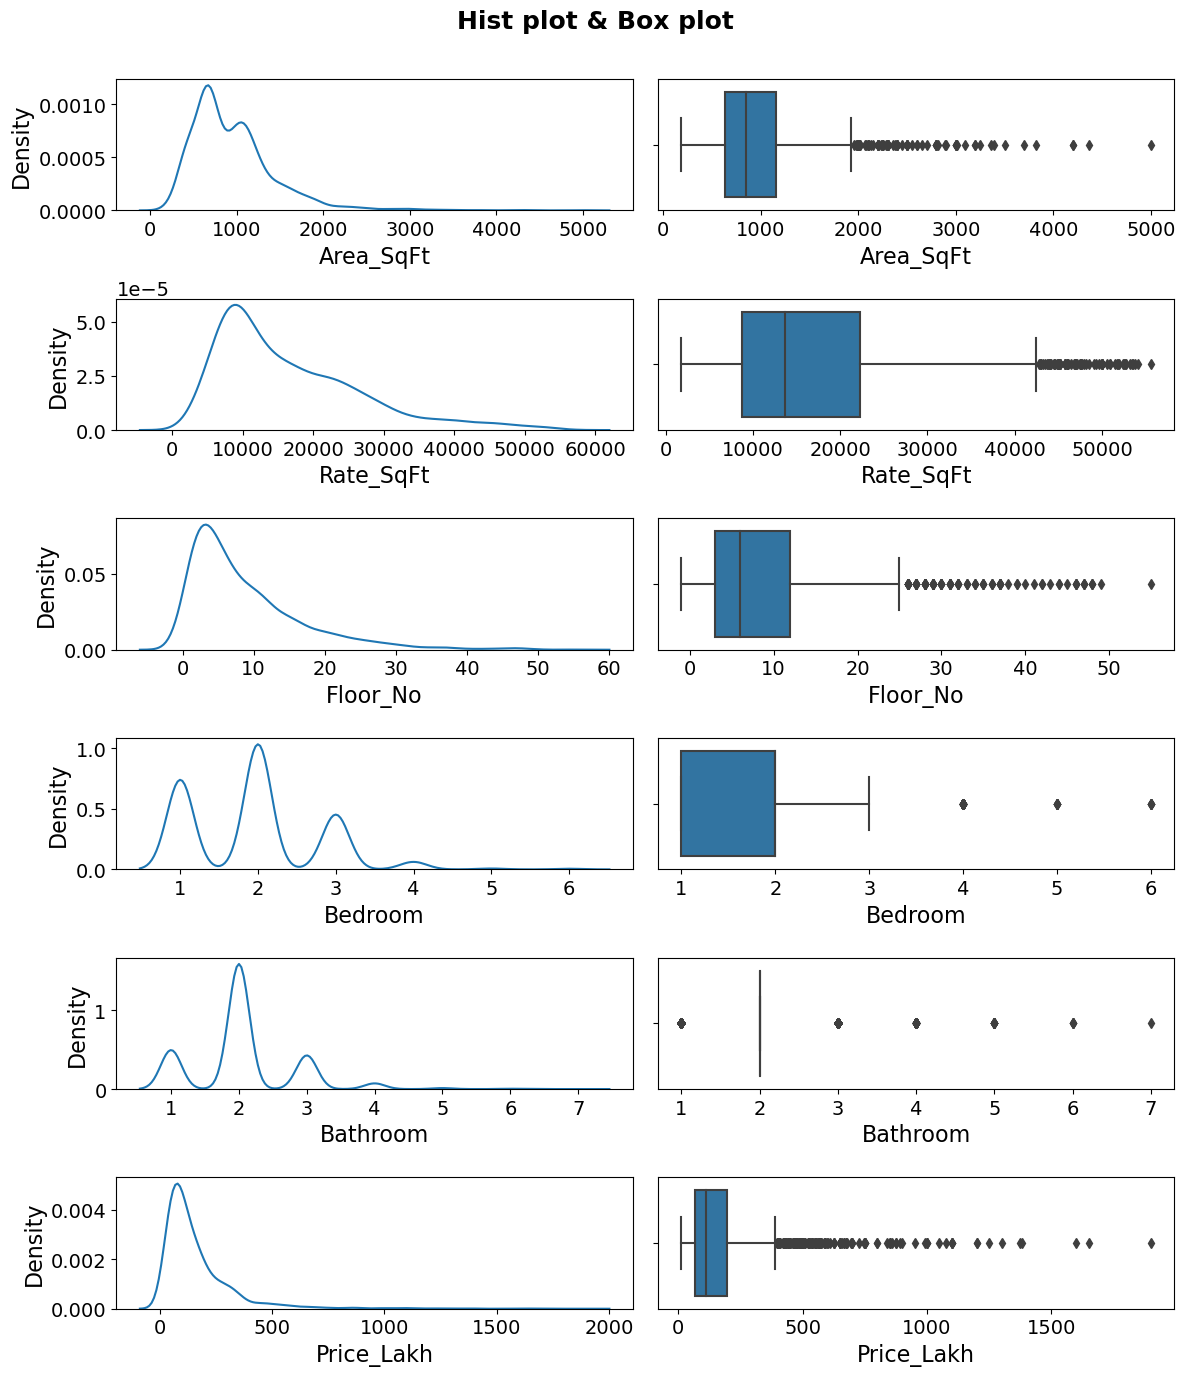

In [34]:
fig, ax = plt.subplots(6, 2, figsize = (12, 14))

fig.suptitle('Hist plot & Box plot', size = 18, fontweight = 'bold')
sns.kdeplot(ax = ax[0,0], data = data_prob, x = 'Area_SqFt')
sns.boxplot(ax = ax[0,1], data = data_prob, x = 'Area_SqFt')
sns.kdeplot(ax = ax[1,0], data = data_prob, x = 'Rate_SqFt')
sns.boxplot(ax = ax[1,1], data = data_prob, x = 'Rate_SqFt')
sns.kdeplot(ax = ax[2,0], data = data_prob, x = 'Floor_No')
sns.boxplot(ax = ax[2,1], data = data_prob, x = 'Floor_No')
sns.kdeplot(ax = ax[3,0], data = data_prob, x = 'Bedroom')
sns.boxplot(ax = ax[3,1], data = data_prob, x = 'Bedroom')
sns.kdeplot(ax = ax[4,0], data = data_prob, x = 'Bathroom')
sns.boxplot(ax = ax[4,1], data = data_prob, x = 'Bathroom')
sns.kdeplot(ax = ax[5,0], data = data_prob, x = 'Price_Lakh')
sns.boxplot(ax = ax[5,1], data = data_prob, x = 'Price_Lakh')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top = 0.93)
plt.show()

##  Witnessing

### Based on data following colums has most outliers & mostly left skewed data:

#### Price_Lakh
#### Area_SqFt
#### Rate_SqFt
#### Floor_No

## 4. Heatmap

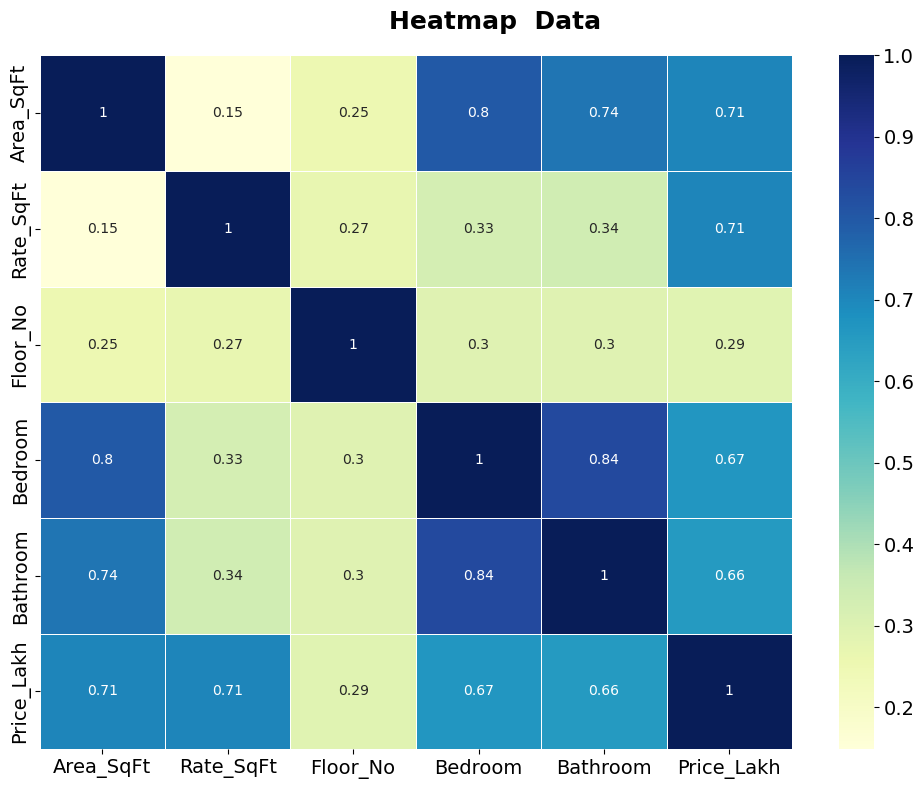

In [35]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(data_prob.corr(), annot = True, cmap = 'YlGnBu', linewidth = 0.5)

fig.suptitle('Heatmap  Data', size = 18, fontweight = 'bold')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

In [36]:
data_prob.nunique()

Property_Name     894
Location         1294
Region            145
Property_Age        5
Availability        2
Area_Tpye           4
Area_SqFt         696
Rate_SqFt        1990
Floor_No           52
Bedroom             6
Bathroom            7
Price_Lakh        467
dtype: int64

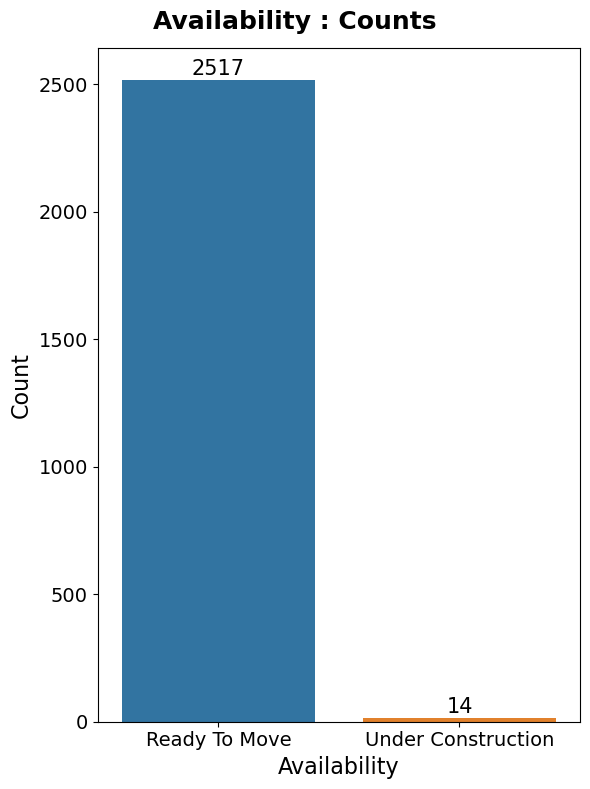

In [37]:
fig, ax = plt.subplots(figsize = (6, 8))
plot = sns.barplot(data = data_prob, x = data_prob.Availability.value_counts().index,
                            y = data_prob.Availability.value_counts().values)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha = 'center', va = 'center', size = 15, xytext = (0, 8), textcoords='offset points')

fig.suptitle('Availability : Counts', fontsize = 18, fontweight = 'bold')
plt.xlabel ('Availability',)
plt.ylabel ('Count')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### 6. Price with respect to Property Age

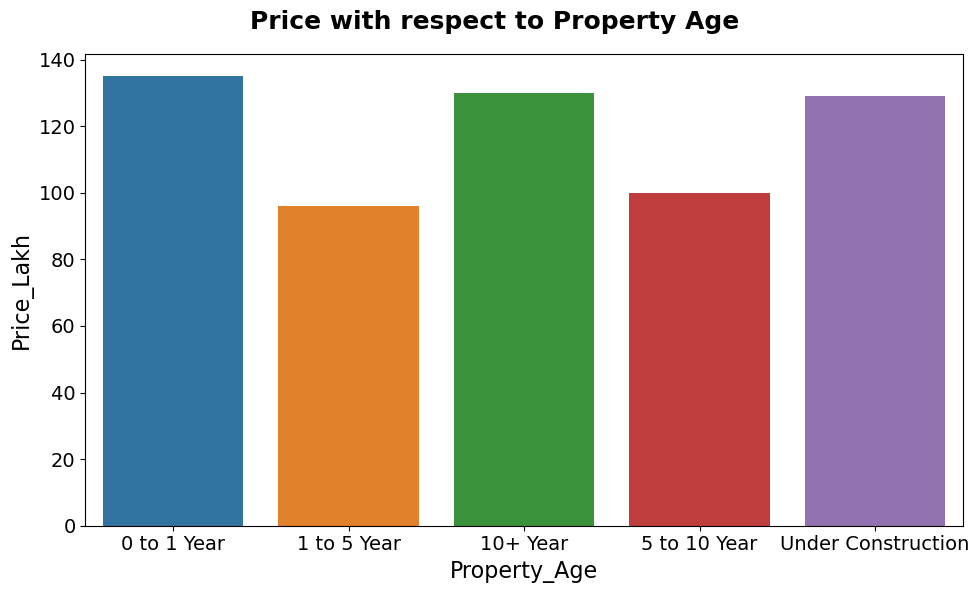

In [38]:
fig = plt.figure(figsize = (10, 6))

sns.barplot(data = data_prob, y = data_prob.groupby('Property_Age').median().Price_Lakh, x = data_prob.groupby('Property_Age').median().index)
fig.suptitle('Price with respect to Property Age', fontsize = 18, fontweight = 'bold')
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

In [39]:
data_prob['Property_Age'].unique()

array(['0 to 1 Year', '1 to 5 Year', '10+ Year', '5 to 10 Year',
       'Under Construction'], dtype=object)

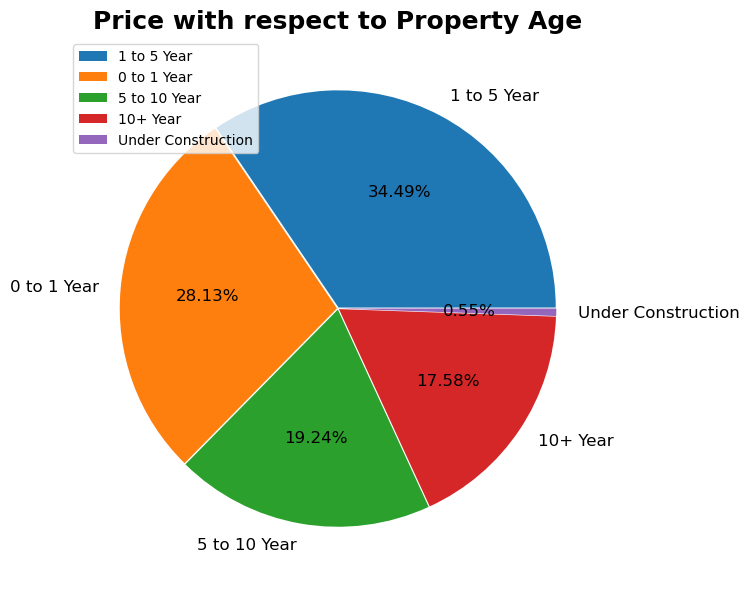

In [40]:
fig = plt.figure(figsize = (8, 6))

plt.pie( data_prob['Property_Age'].value_counts(),
       labels = ['1 to 5 Year','0 to 1 Year','5 to 10 Year','10+ Year','Under Construction'],
       autopct =  '%.2f%%', textprops = {'size': 'large'}, explode = [0.005,0.005,0.005,0.005,0.005])

plt.legend(loc = 'upper left')
plt.title('Price with respect to Property Age', fontsize = 18, fontweight = 'bold')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

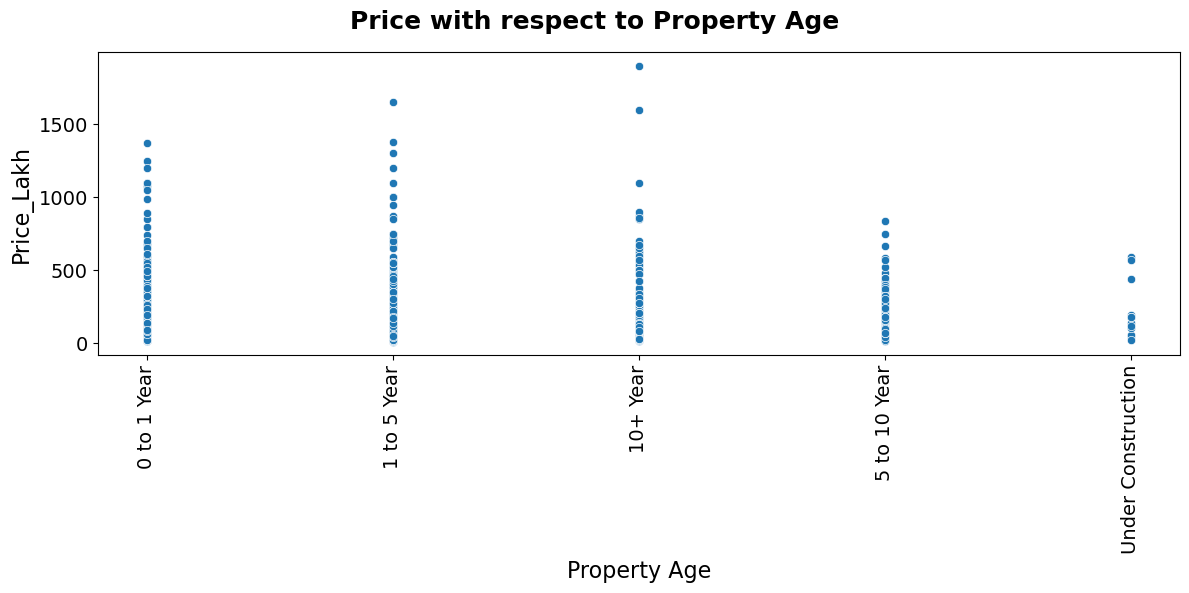

In [41]:
fig = plt.figure(figsize = (12, 6))
fig.suptitle('Price with respect to Property Age', fontsize = 18, fontweight = 'bold')

sns.scatterplot(data = data_prob , x = data_prob['Property_Age'], y = data_prob['Price_Lakh'])
plt.xlabel ('Property Age',)
plt.ylabel ('Price_Lakh')
plt.xticks(rotation = 90)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### 6.2 Price with respect to Bed & Bath

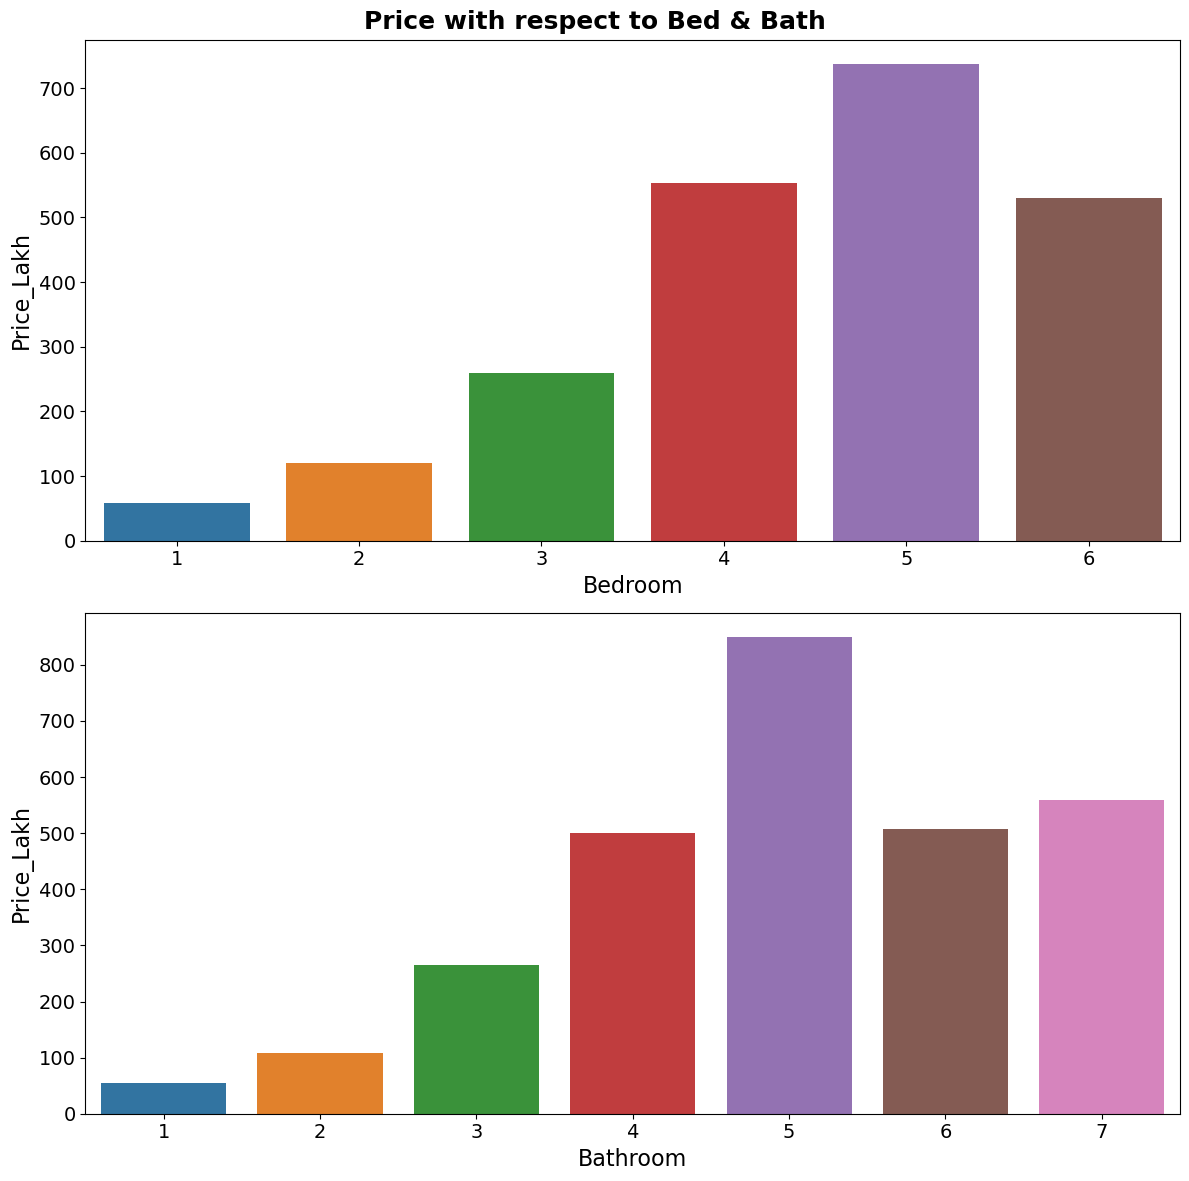

In [42]:
fig, ax = plt.subplots(2, 1, figsize = (12, 12))
plot = sns.barplot(ax = ax[0], data = data_prob, x = data_prob.groupby('Bedroom').median().index,
                            y = data_prob.groupby('Bedroom').median().Price_Lakh)
plot = sns.barplot(ax = ax[1], data = data_prob, x = data_prob.groupby('Bathroom').median().index,
                            y = data_prob.groupby('Bathroom').median().Price_Lakh)

fig.suptitle('Price with respect to Bed & Bath', size = 18, fontweight="bold")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

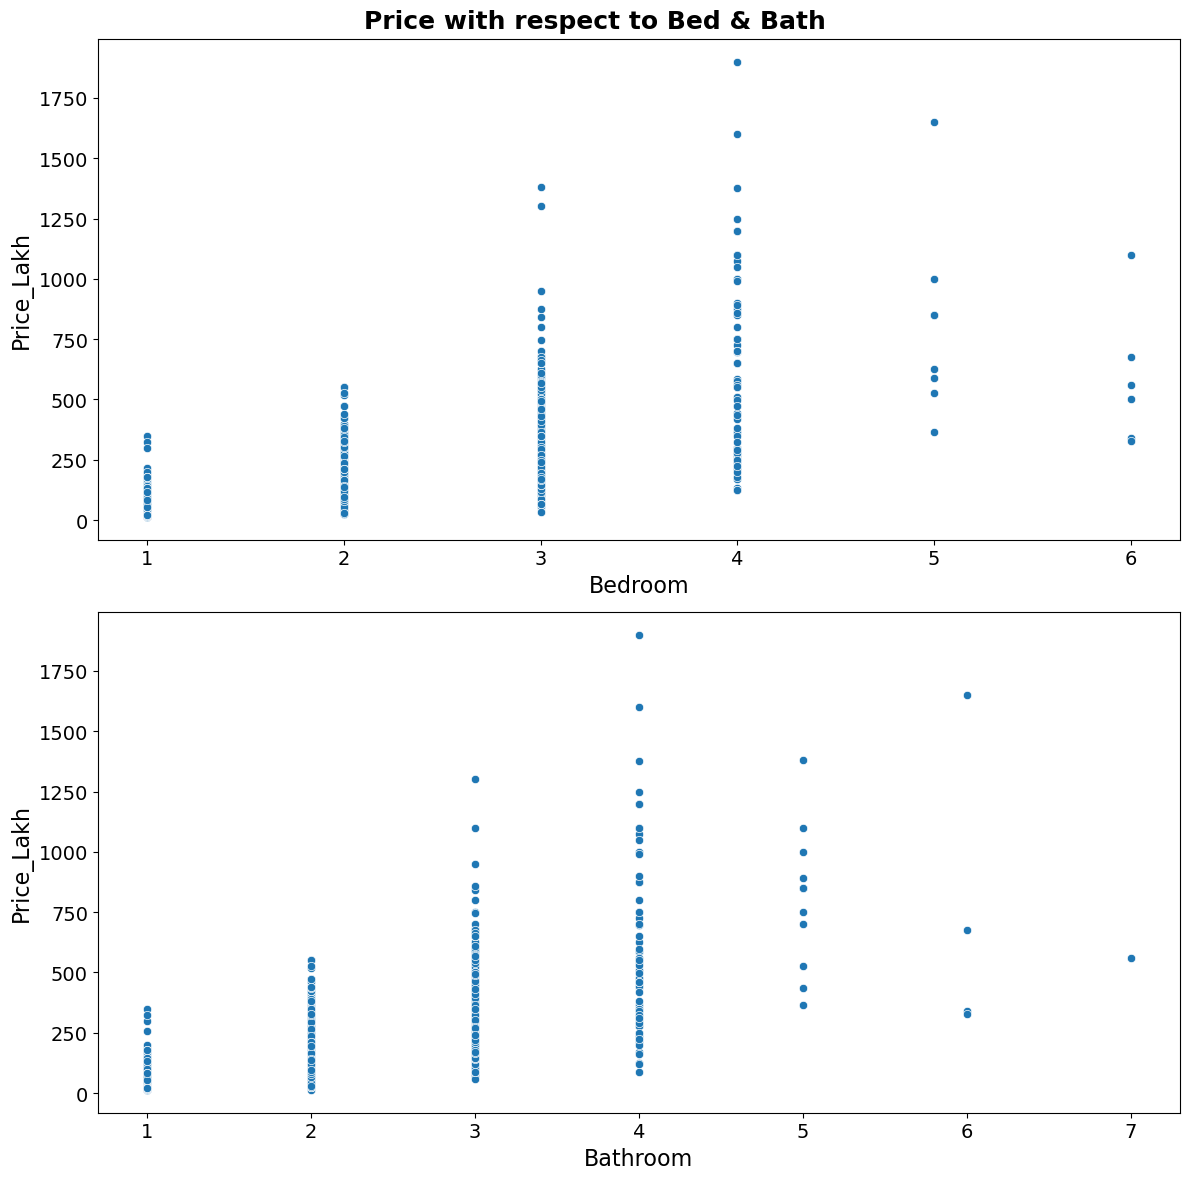

In [43]:
fig, ax = plt.subplots(2, 1, figsize = (12, 12))
fig.suptitle('Price with respect to Bed & Bath', fontsize = 18, fontweight = 'bold')

sns.scatterplot(ax = ax[0], data = data_prob ,  x = data_prob['Bedroom'], y = data_prob['Price_Lakh'])
sns.scatterplot(ax = ax[1], data = data_prob ,  x = data_prob['Bathroom'], y = data_prob['Price_Lakh'])


pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.tight_layout()
plt.show()

### Area Type Distribution

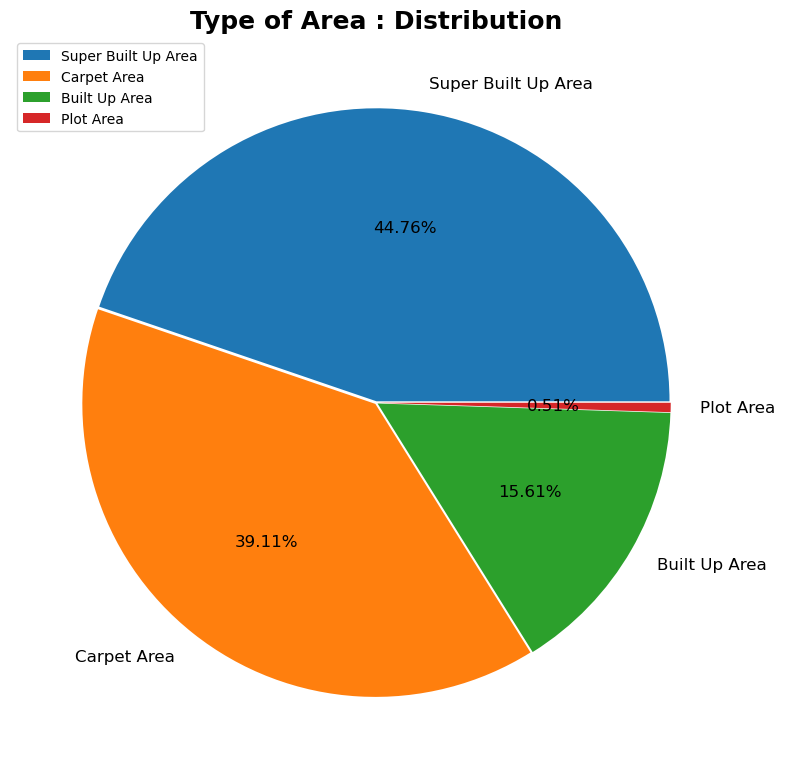

In [44]:
fig = plt.figure(figsize = (8, 8))

plt.pie( data_prob['Area_Tpye'].value_counts(),
       labels = ['Super Built Up Area','Carpet Area','Built Up Area','Plot Area'],
       autopct =  '%.2f%%', textprops = {'size': 'large'}, explode = [0.005,0.005,0.005,0.005])

plt.legend(loc = 'upper left')
plt.title('Type of Area : Distribution', fontsize = 18, fontweight = 'bold')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

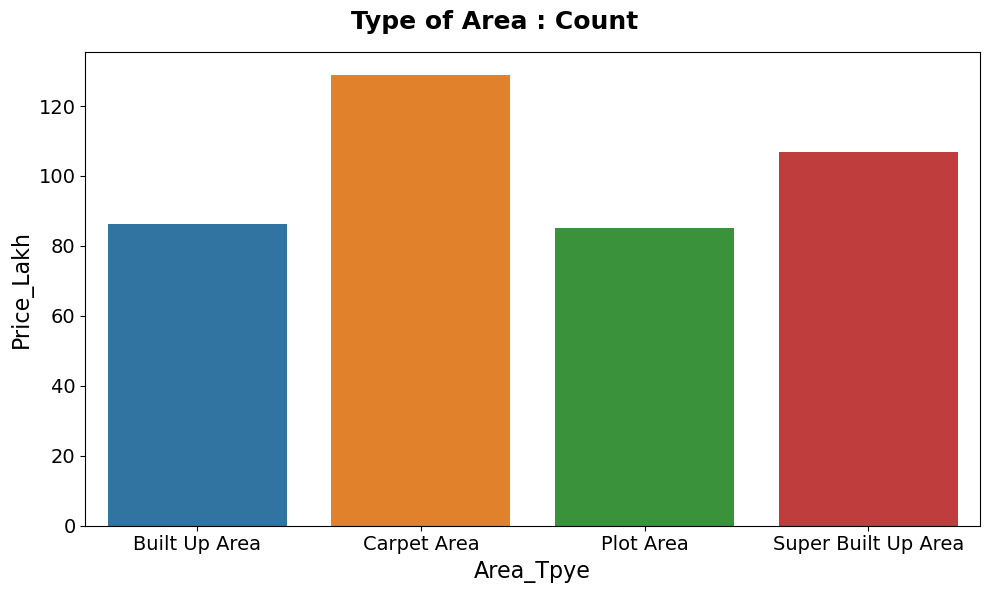

In [45]:
fig = plt.figure(figsize = (10, 6))

sns.barplot(data = data_prob, y = data_prob.groupby('Area_Tpye').median().Price_Lakh, x = data_prob.groupby('Area_Tpye').median().index)
fig.suptitle('Type of Area : Count', fontsize = 18, fontweight = 'bold')
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Price with respect to Floor Numbers

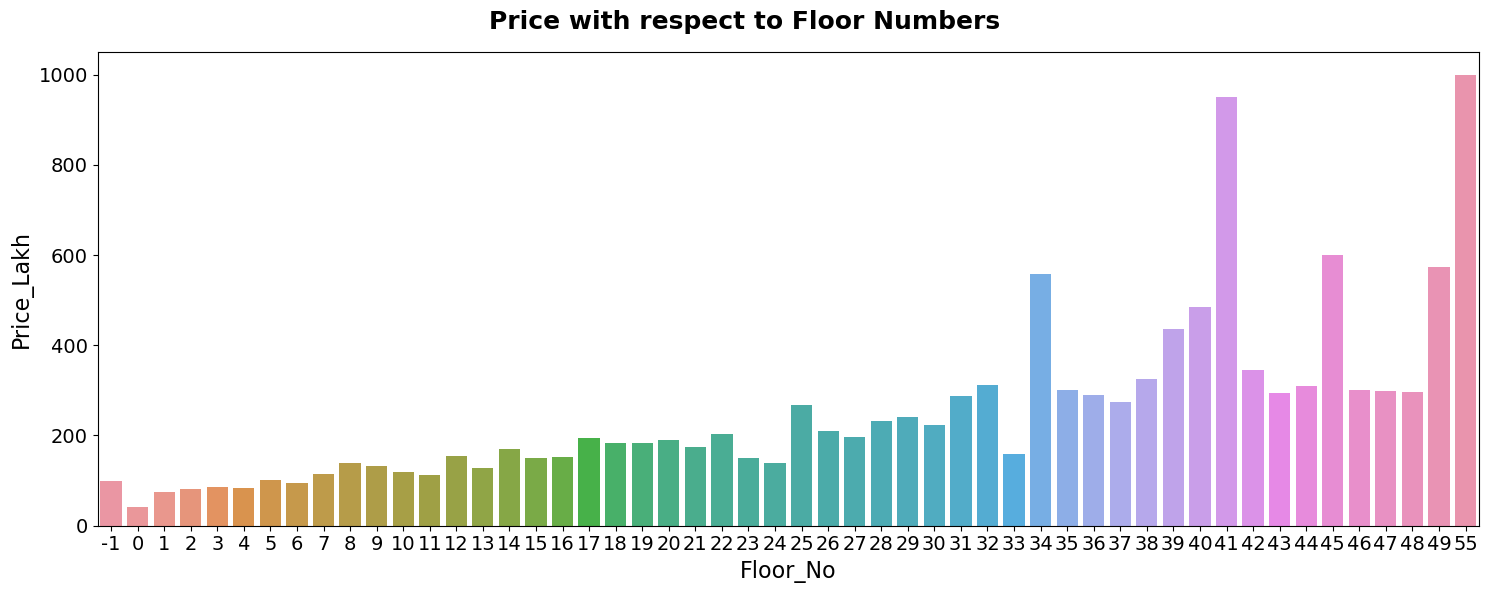

In [46]:
fig = plt.figure(figsize = (15, 6))
params = {'xtick.labelsize':'8','ytick.labelsize':'14','axes.labelsize':'16'}

sns.barplot(data = data_prob, y = data_prob.groupby('Floor_No').median().Price_Lakh, x = data_prob.groupby('Floor_No').median().index)
fig.suptitle('Price with respect to Floor Numbers', fontsize = 18, fontweight = 'bold')
pylab.rcParams.update(params)
fig.tight_layout()
plt.show()

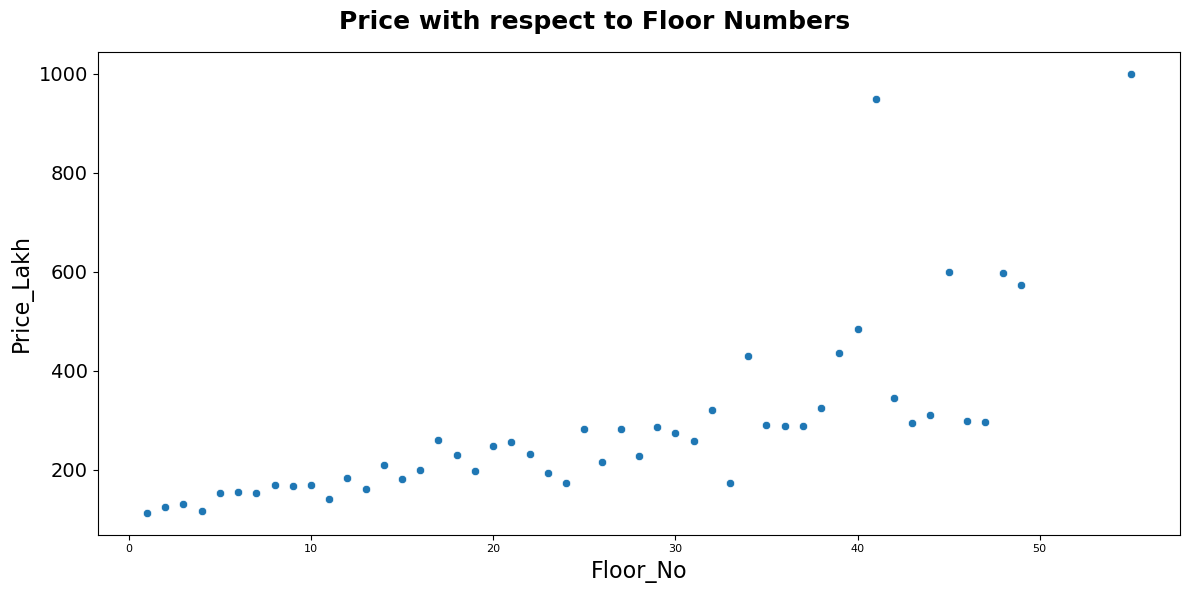

In [47]:
fig = plt.figure(figsize = (12, 6))

group_full = data_prob.groupby('Floor_No')['Price_Lakh'].mean()
group = group_full.reset_index()
group = group[group['Floor_No'] > 0]
group = group[group['Floor_No'] < 60]

x = group['Floor_No']
y  = group['Price_Lakh']

fig.suptitle('Price with respect to Floor Numbers', fontsize = 18, fontweight = 'bold')
sns.scatterplot(x = x, y = y)
pylab.rcParams.update(params)
fig.tight_layout()
plt.show()

## From above visualization we have concluded following points for higher Price.
#### As number of bedroom increased price also has incresed
#### As floor number goes higher price also increased
#### 4 BHK and 5 BHK price higher
#### Plot Area criteria is higher price
#### Upcoming New Project prices are higher

### Price with respect to SqFt Area

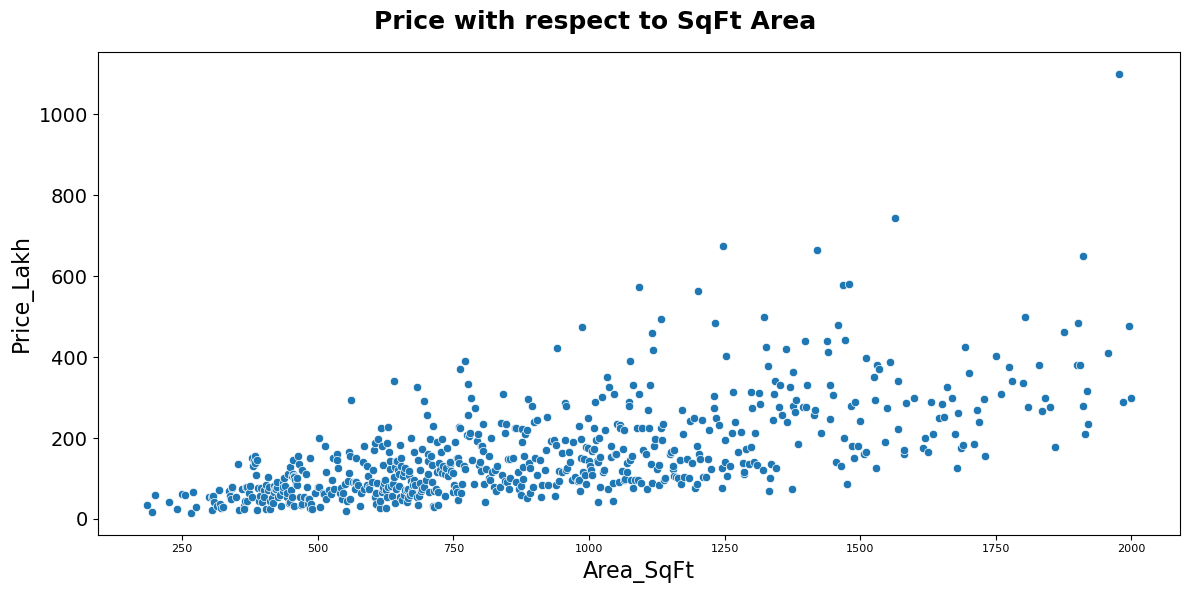

In [48]:
fig = plt.figure(figsize = (12, 6))

group_full = data_prob.groupby('Area_SqFt')['Price_Lakh'].mean()
group = group_full.reset_index()
group = group[group['Area_SqFt'] > 0]
group = group[group['Area_SqFt'] < 2000]

x = group['Area_SqFt']
y  = group['Price_Lakh']

fig.suptitle('Price with respect to SqFt Area', fontsize = 18, fontweight = 'bold')
sns.scatterplot(x = x, y = y)
pylab.rcParams.update(params)
fig.tight_layout()
plt.show()

## Data visualization for 'Rate_SqFt' for Location 'Mira Road'
### Note here its normal distribuation of data so outlier removal using stad deviation and mean works perfectly here

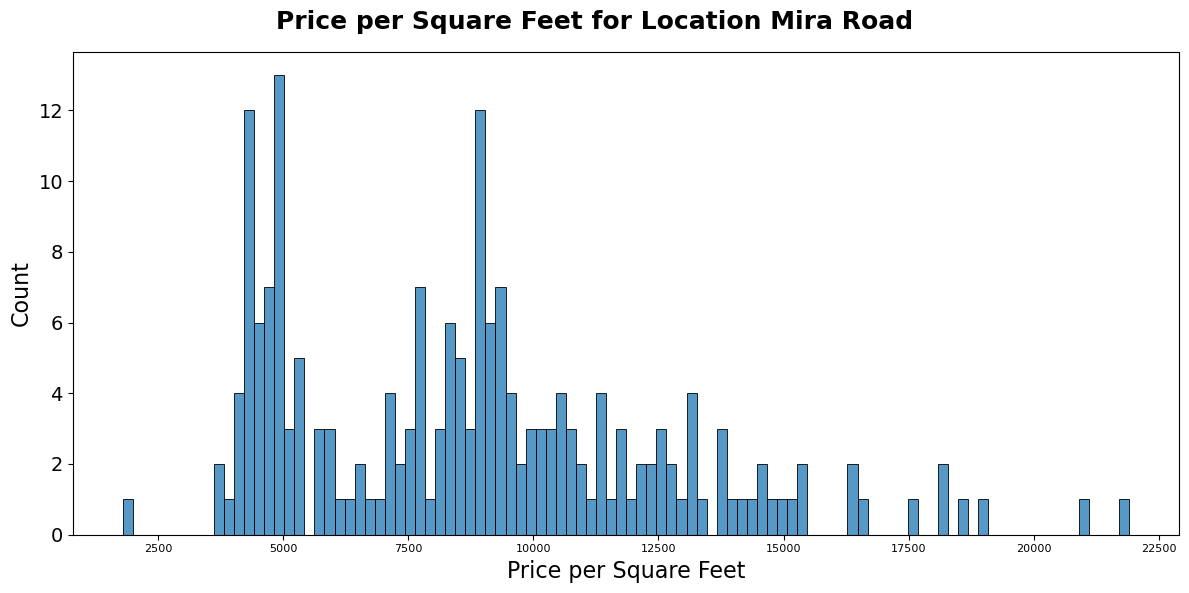

In [49]:
fig = plt.figure(figsize = (12, 6))
fig.suptitle('Price per Square Feet for Location Mira Road', size = 18, fontweight = 'bold')

sns.histplot(data_prob[data_prob.Region == 'Mira Road'].Rate_SqFt, bins = 100)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

## Target Varible

In [50]:
data_prob['Price_Cat'] = pd.cut(x = data_prob['Price_Lakh'], bins = [13, 70, 190, 16500], labels = ['Low','Medium','High'], right = False)
data_prob.Price_Cat.value_counts()

Medium    1187
High       674
Low        670
Name: Price_Cat, dtype: int64

### Checking for Imbalanced or balanced dataset with regards to the Target

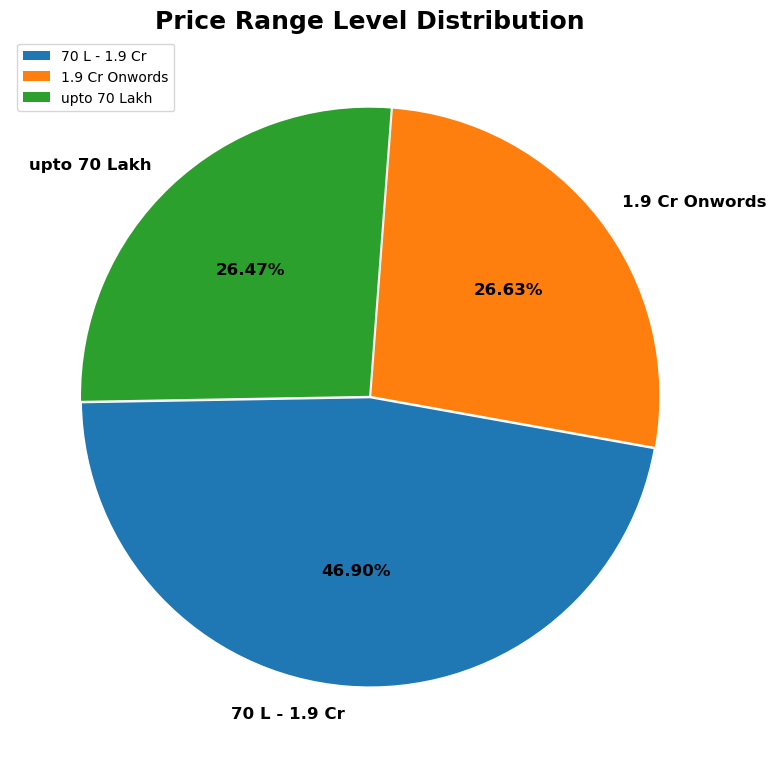

In [51]:
fig = plt.figure(figsize = (8, 8))

plt.pie(data_prob['Price_Cat'].value_counts(), labels = ['70 L - 1.9 Cr','1.9 Cr Onwords','upto 70 Lakh'],
        explode = [0.005,0.005,0.005], autopct = '%.2f%%', startangle = 181, textprops= {'size':'large','fontweight':'bold'})

plt.legend(loc = 'upper left')
plt.title('Price Range Level Distribution', fontsize = 18, fontweight = 'bold')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

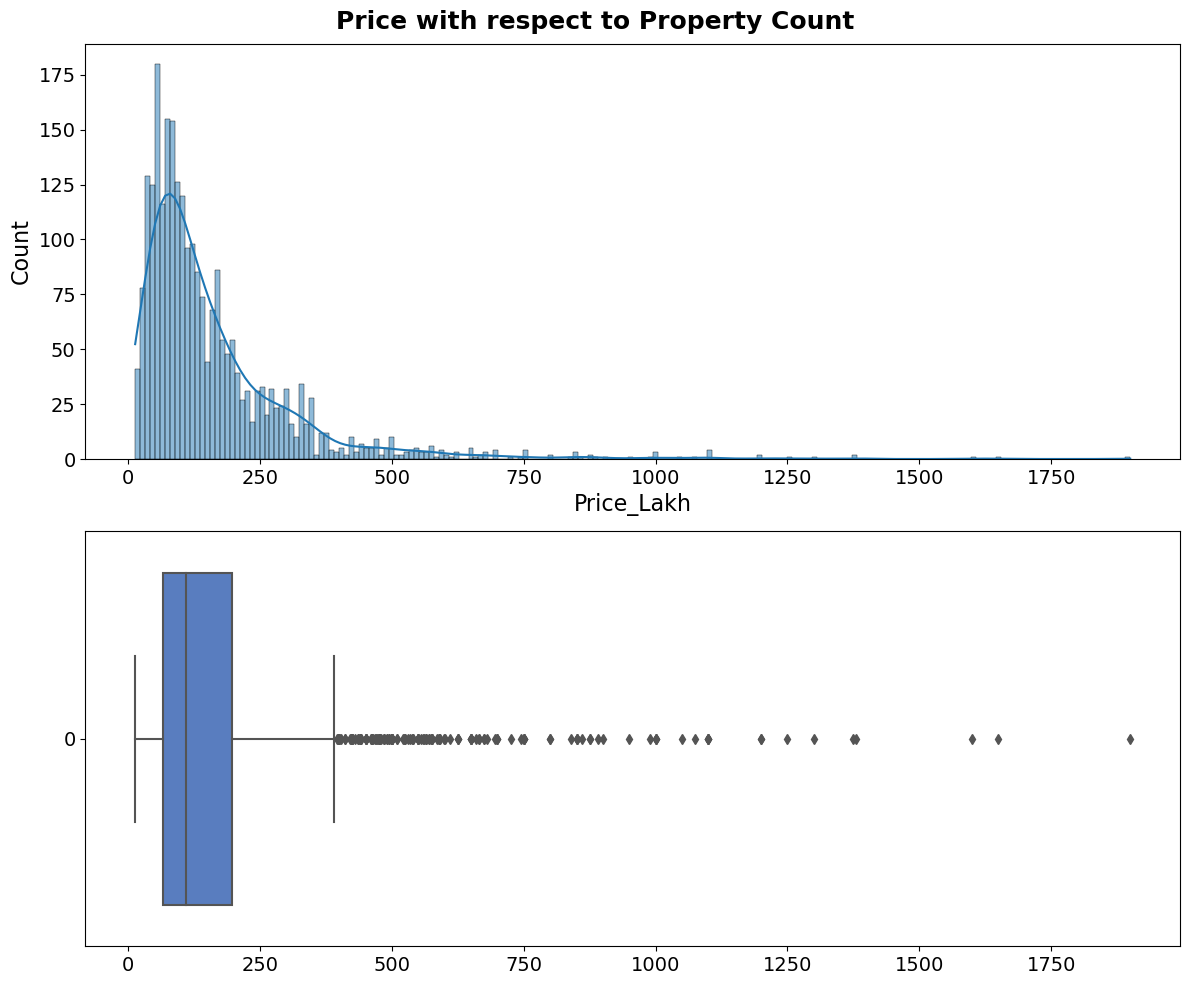

In [52]:
fig, ax = plt.subplots(2, 1, figsize = (12, 10))

fig.suptitle('Price with respect to Property Count', size = 18, fontweight = 'bold')
sns.histplot(ax = ax[0], data = data_prob['Price_Lakh'], kde = True, bins = 200)
sns.boxplot(ax = ax[1], data = data_prob['Price_Lakh'], orient = 'h', palette = 'muted')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Bar plot Region wise Price

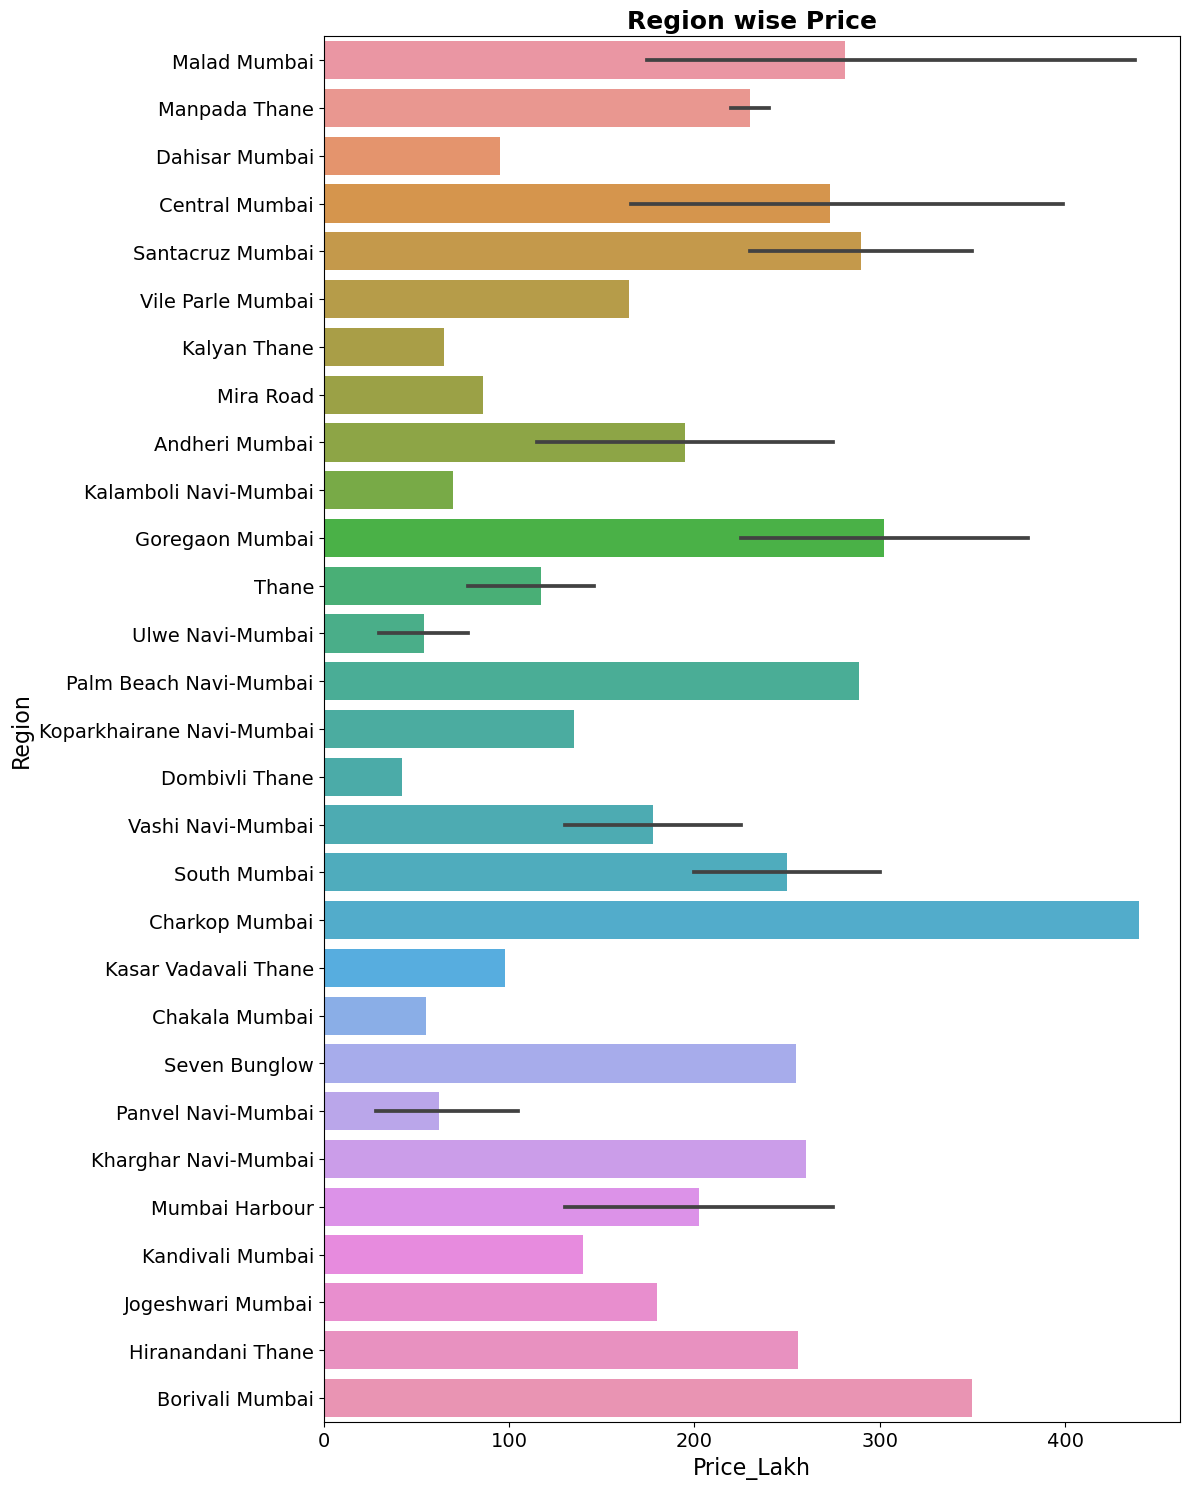

In [53]:
fig = plt.figure(figsize = (12, 15))
sns.barplot(x = 'Price_Lakh', y = 'Region', data = data_prob.head(50))
plt.title('Region wise Price', size = 18, fontweight="bold")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Check for a given Region how does the 2 BHK and 3 BHK Property Prices look like

In [54]:
def plot_scatter(data_prop, Region):
    fig = plt.figure(figsize = (10,7))
    rhb2 = data_prop[(data_prop.Region == Region) & (data_prop.Bedroom == 2)]
    rhb3 = data_prop[(data_prop.Region == Region) & (data_prop.Bedroom == 3)]
    rhb4 = data_prop[(data_prop.Region == Region) & (data_prop.Bedroom == 4)]
    plt.rcParams['figure.figsize'] = (14,12)
    sns.scatterplot(x = rhb2.Area_SqFt, y = rhb2.Price_Lakh, marker = 'p', color = 'blue', label = '2 RHB', s = 100)
    sns.scatterplot(x = rhb3.Area_SqFt, y = rhb3.Price_Lakh, marker = 'o', color = 'red', label = '3 RHB', s = 100)
    sns.scatterplot(x = rhb4.Area_SqFt, y = rhb4.Price_Lakh, marker = '*', color = 'green', label = '4 RHB', s = 300)
    
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (Lakhs Indian Rupees)')
    plt.title(Region, fontsize = 18, fontweight="bold")
    
    pylab.rcParams.update(rcParams)
    plt.legend(fontsize = 12)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)

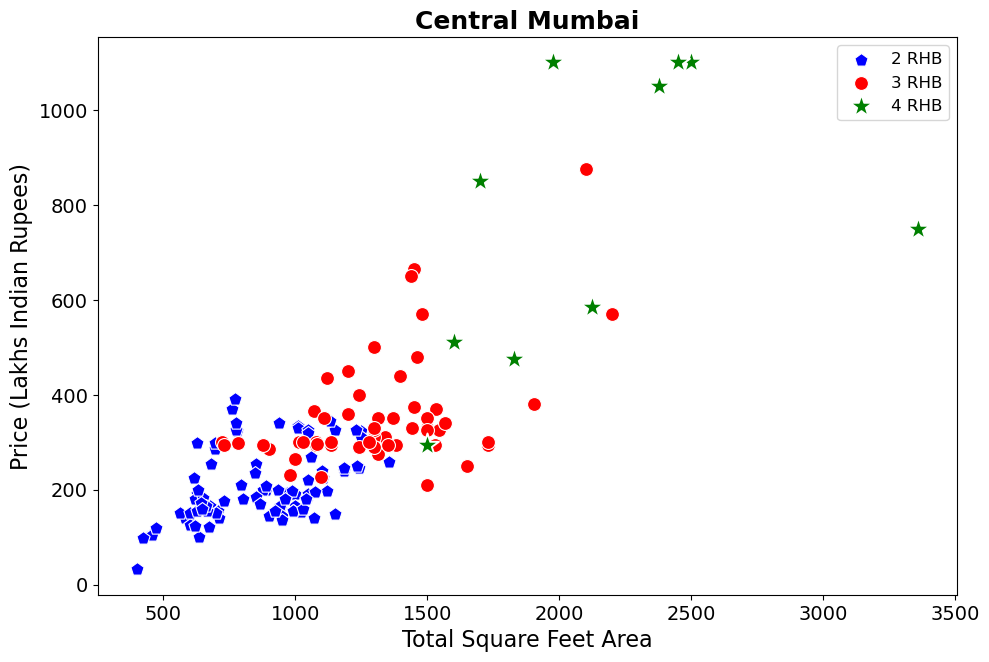

In [55]:
plot_scatter(data_prob, 'Central Mumbai')

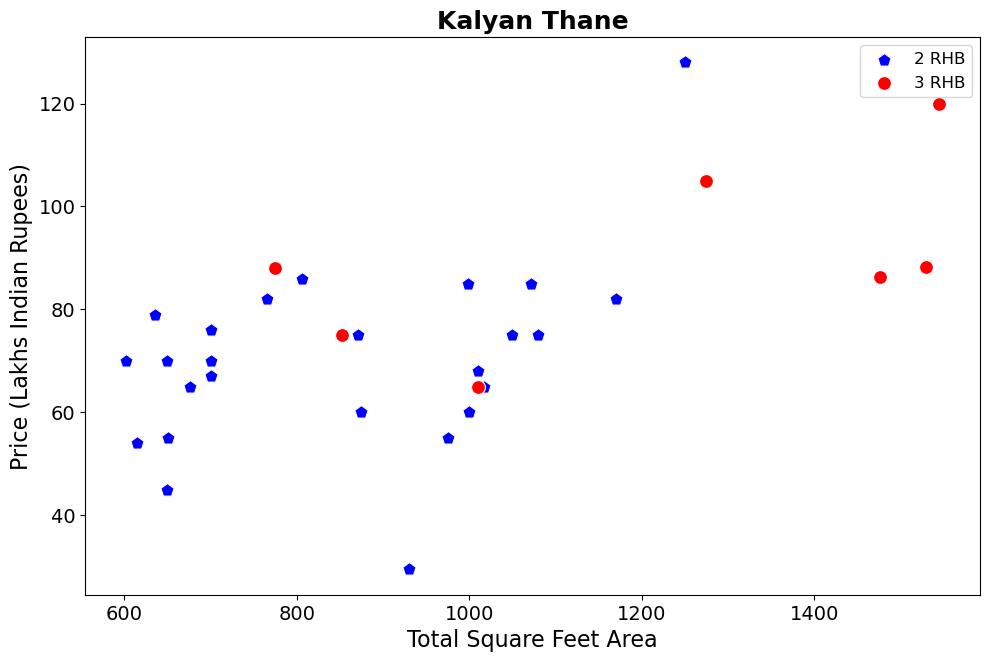

In [61]:
plot_scatter(data_prob, "Kalyan Thane")

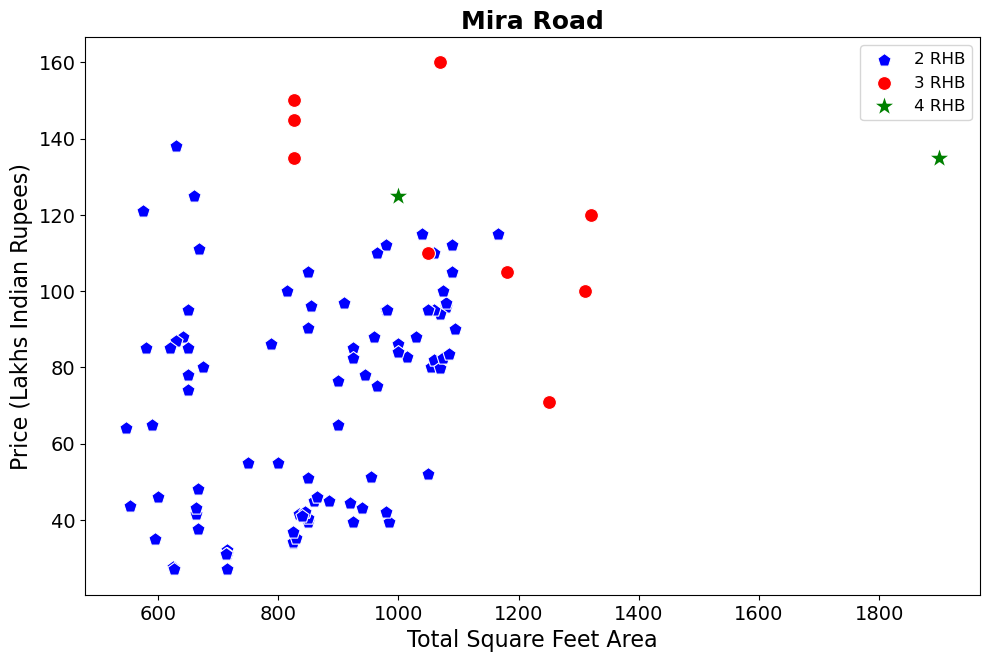

In [60]:
plot_scatter(data_prob, "Mira Road")

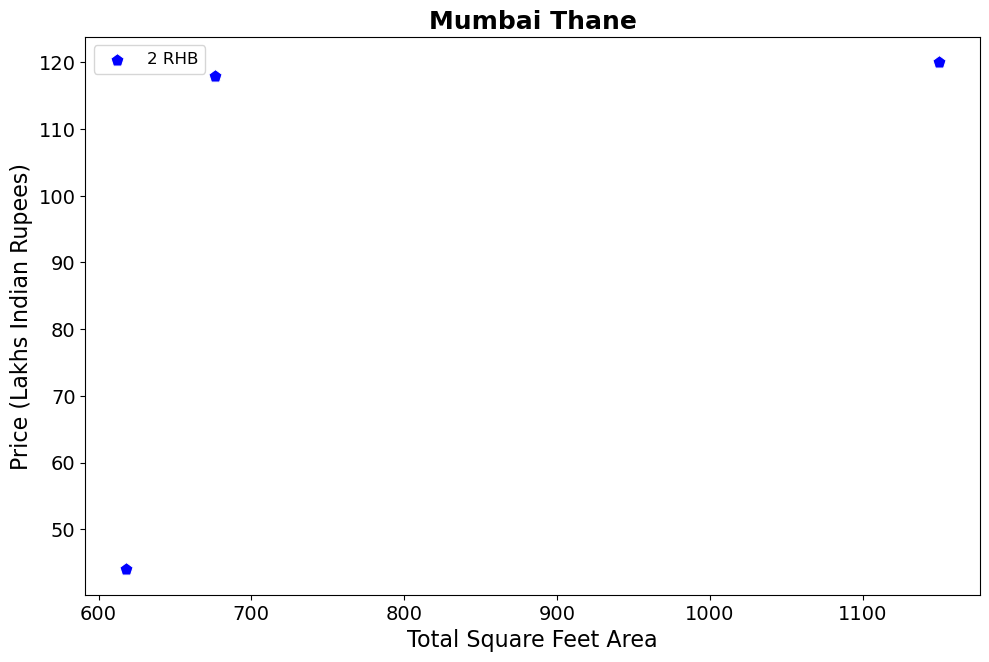

In [58]:
plot_scatter(data_prob, "Mumbai Thane")